# Plotting data from pandas dataframes

Lesson website: https://swcarpentry.github.io/python-novice-gapminder/09-plotting.html

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#### pandas plot()
Plot data directly from a Pandas dataframe.
<p>We can also plot Pandas dataframes.
<p>Before plotting, we convert the column headings from a string to integer data type, since they represent numerical values, using str.replace() to remove the gpdPercap_ prefix and then astype(int) to convert the series of string values (['1952', '1957', ..., '2007']) to a series of integers: [1925, 1957, ..., 2007].


In [17]:
df_oceania = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

df_oceania

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [18]:
# Extract year from last 4 characters of each column name
# The current column names are structured as 'gdpPercap_(year)',
# so we want to keep the (year) part only for clarity when plotting GDP vs. years
# To do this we use replace(), which removes from the string the characters stated in the argument
# This method works on strings, so we use replace() from Pandas Series.str vectorized string functions

years = df_oceania.columns.str.replace('gdpPercap_', '')

# Convert year values to integers, saving results back to dataframe

df_oceania.columns = years.astype(int)
df_oceania

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


<Axes: >

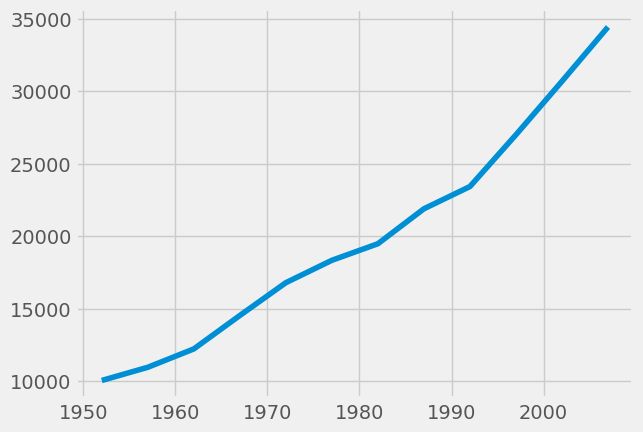

In [19]:
df_oceania.loc['Australia'].plot()

.plot() is a wrapper function for a visualization library in python, matplotlib. You can add an argument, kind, to change the type of plot displayed.

For example, `df.plot(kind='bar')`. Note that the default kind is 'line'.

|string value|plot type|
-------------|----------
|'line' | line plot (default)|
|'bar' | vertical bar plot|
|'barh' | horizontal bar plot|
|'hist' | histogram|
|'box' | boxplot|
|'kde' | Kernel Density Estimation plot|
|'density' | same as kde|
|'area' |area plot|
|'pie' | pie plot|
|'scatter' | scatter plot (DataFrame only)|
|'hexbin' | hexbin plot (DataFrame only)|

You should make sure that your data is oriented in the right way. For example, with a line chart each column corresponds to a line. If your plot looks weird, try transposing your dataframe with `df.T`

<Axes: xlabel='country'>

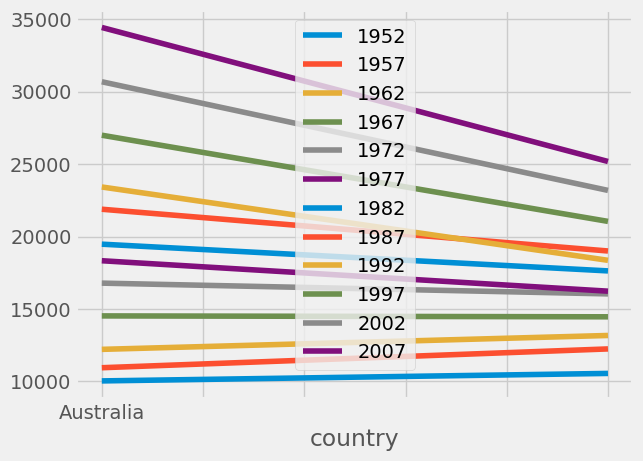

In [20]:
df_oceania.plot()

<Axes: >

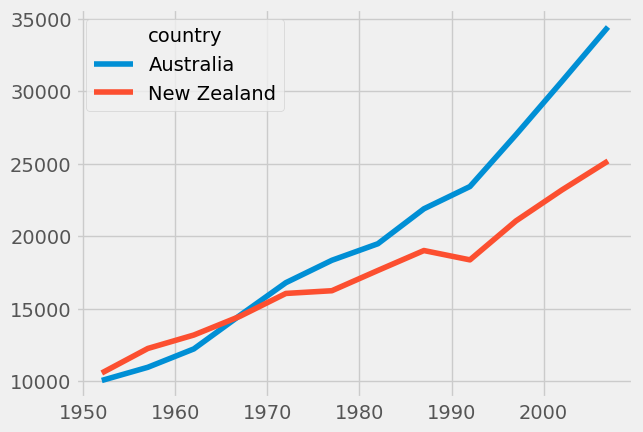

In [21]:
df_oceania.T.plot()

### Style your plot!

You can use matplotlib to style your plot! Here are some examples:

Text(0, 0.5, 'GDP per capita')

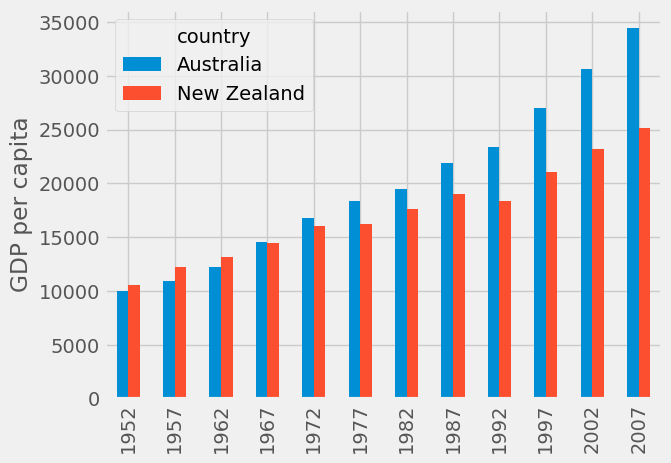

In [22]:
df_oceania.T.plot(kind='bar')
plt.ylabel('GDP per capita')

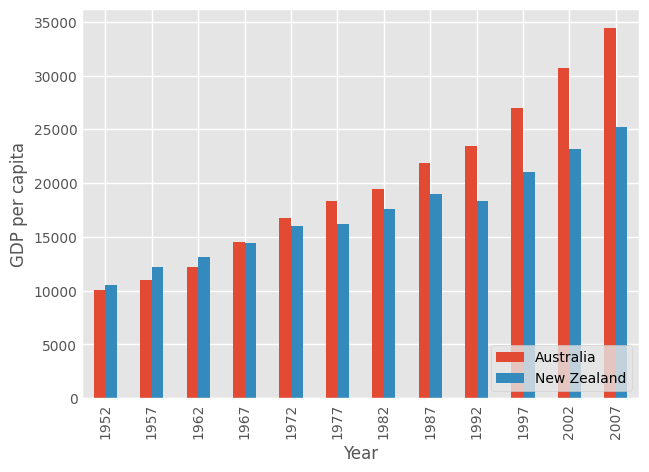

In [23]:
plt.style.use('ggplot')
df_oceania.T.plot(kind='bar')
plt.ylabel('GDP per capita')
plt.xlabel('Year')
plt.legend(loc='lower right')

'ggplot' is one of many styles you can use. Here is a list with examples: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

### Save your plot

You can use `plt.savefig('filename.png')` to save your plot to an image file. Make sure  you first use the `plt.gcf()` (get current figure) function. For example:

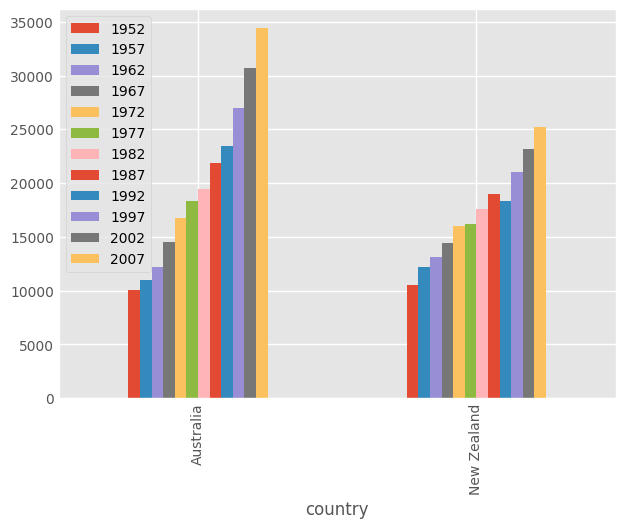

In [24]:
df_oceania.plot(kind='bar')
fig = plt.gcf()
fig.savefig('my_figure.png')

## Practice Time!
1. Import new region specific gapminder data (e.g. Europe) and make a plot showing gdp for that region over time. Start by replicating the plots we just made for Oceania, and then if you’re up for it try a new "kind" of plot!

In [25]:
df_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
df_asia

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Afghanistan,779.445314,820.853030,853.100710,836.197138,739.981106,786.113360,978.011439,852.395945,649.341395,635.341351,726.734055,974.580338
Bahrain,9867.084765,11635.799450,12753.275140,14804.672700,18268.658390,19340.101960,19211.147310,18524.024060,19035.579170,20292.016790,23403.559270,29796.048340
Bangladesh,684.244172,661.637458,686.341554,721.186086,630.233627,659.877232,676.981866,751.979403,837.810164,972.770035,1136.390430,1391.253792
Cambodia,368.469286,434.038336,496.913648,523.432314,421.624026,524.972183,624.475478,683.895573,682.303175,734.285170,896.226015,1713.778686
China,400.448611,575.987001,487.674018,612.705693,676.900092,741.237470,962.421381,1378.904018,1655.784158,2289.234136,3119.280896,4959.114854
Hong Kong China,3054.421209,3629.076457,4692.648272,6197.962814,8315.928145,11186.141250,14560.530510,20038.472690,24757.603010,28377.632190,30209.015160,39724.978670
India,546.565749,590.061996,658.347151,700.770611,724.032527,813.337323,855.723538,976.512676,1164.406809,1458.817442,1746.769454,2452.210407
Indonesia,749.681655,858.900271,849.289770,762.431772,1111.107907,1382.702056,1516.872988,1748.356961,2383.140898,3119.335603,2873.912870,3540.651564
Iran,3035.326002,3290.257643,4187.329802,5906.731805,9613.818607,11888.595080,7608.334602,6642.881371,7235.653188,8263.590301,9240.761975,11605.714490


In [26]:
# Extract year from last 4 characters of each column name
# The current column names are structured as 'gdpPercap_(year)',
# so we want to keep the (year) part only for clarity when plotting GDP vs. years
# To do this we use replace(), which removes from the string the characters stated in the argument
# This method works on strings, so we use replace() from Pandas Series.str vectorized string functions

years = df_asia.columns.str.replace('gdpPercap_', '')

# Convert year values to integers, saving results back to dataframe

df_asia.columns = years.astype(int)
df_asia

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,779.445314,820.853030,853.100710,836.197138,739.981106,786.113360,978.011439,852.395945,649.341395,635.341351,726.734055,974.580338
Bahrain,9867.084765,11635.799450,12753.275140,14804.672700,18268.658390,19340.101960,19211.147310,18524.024060,19035.579170,20292.016790,23403.559270,29796.048340
Bangladesh,684.244172,661.637458,686.341554,721.186086,630.233627,659.877232,676.981866,751.979403,837.810164,972.770035,1136.390430,1391.253792
Cambodia,368.469286,434.038336,496.913648,523.432314,421.624026,524.972183,624.475478,683.895573,682.303175,734.285170,896.226015,1713.778686
China,400.448611,575.987001,487.674018,612.705693,676.900092,741.237470,962.421381,1378.904018,1655.784158,2289.234136,3119.280896,4959.114854
Hong Kong China,3054.421209,3629.076457,4692.648272,6197.962814,8315.928145,11186.141250,14560.530510,20038.472690,24757.603010,28377.632190,30209.015160,39724.978670
India,546.565749,590.061996,658.347151,700.770611,724.032527,813.337323,855.723538,976.512676,1164.406809,1458.817442,1746.769454,2452.210407
Indonesia,749.681655,858.900271,849.289770,762.431772,1111.107907,1382.702056,1516.872988,1748.356961,2383.140898,3119.335603,2873.912870,3540.651564
Iran,3035.326002,3290.257643,4187.329802,5906.731805,9613.818607,11888.595080,7608.334602,6642.881371,7235.653188,8263.590301,9240.761975,11605.714490


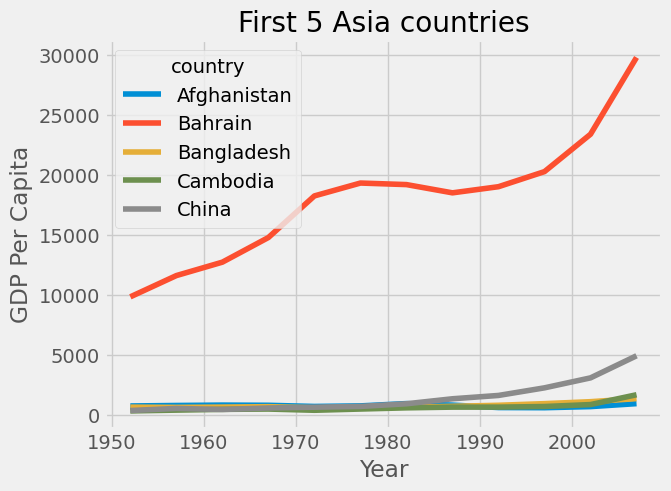

In [27]:
plt.style.use('fivethirtyeight')
df_asia.head().T.plot()
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('First 5 Asia countries')
fig = plt.gcf()
fig.savefig('jf_gapminder.png')

2. Import gapminder all (with pop, life expectancy, gdp), plot one of the available datapoints for a specific region by creating a new dataframe with the filtered rows and columns

3. Go crazy! Get creative! Make a totally new plot using the gapminder data, and play with style and formatting options. Can refer to [COB branding](https://www.boston.gov/departments/innovation-and-technology/brand-guidelines) and the [pandas.plot() documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).